# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Dado que la matriz A de (4) se define por partes dependiendo de si Cj ≠ 0 o si Cj = 0, vamos a analizar estos dos casos por separado:

Llamemos A' = p W D + e z^t

Analizamos elemento por elemento, ya que la función partida define una posición de la matriz A.

Cuando Cj ≠ 0: 
En este caso, los elementos de la matriz A están definidos como (1 - p) / n + (p Wij) / Cj
Esto es equivalente a p W D + e z^t , pues en el lado izquierdo de la suma de A' tenemos a p multiplicando a W (lo cual encontramos en el lado derecho de la suma de A), y esto multiplicado por D (matriz diagonal definida en partes), cuyos elementos valen 1 / Cj cuando Cj ≠ 0.
Así obtenemos que el lado izquierdo de la suma de A' es igual al lado derecho de la suma de A.

Por otro lado, si analizamos el lado derecho de la suma de A', tenemos a e (vector columna de unos) multiplicando a z^t (vector fila) cuyos elementos valen (1 - p) / n cuando Cj ≠ 0. 
Así obtenemos que el lado derecho de la suma de A' es igual al lado izquierdo de la suma de A.

Cuando Cj = 0:
En este caso, los elementos de la matriz A están definidos como 1 / n 
Esto es equivalente a p W D + e z^t , pues en el lado izquierdo de la suma de A' tenemos p W D, pero como D es una matriz diagonal cuyos elementos valen 0 cuando Cj = 0, entonces esta multiplicación resulta cero. Del lado derecho de la suma de A' tenemos a e (vector columna de unos) multiplicando a z^t (vector fila) cuyos elementos valen 1 / n cuando Cj = 0.

Luego, concluimos que la matriz A definida en (4) es equivalente a p W D + e z^t.

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

¿Cómo se garantiza la existencia de la factorización LU? 

La existencia de la factorización LU, se garantiza si la matriz A a factorizar cumple las siguientes características: A debe ser invertible y no puede haber 0s en la diagonal ya que no podriamos triangular la matriz sin intercambiar filas, que terminaria en una factorización PLU.
Esto se debe a que si la matriz A es singular (no invertible), es decir, su determinante es igual a cero, durante el proceso de factorización LU podríamos encontrarnos con la situación en la que se intenta dividir por cero o aparece un elemento igual a cero en la diagonal principal de U (cosas que serían perjudiciales para este algoritmo de factorización).
Por otro lado, la matriz debe ser cuadrada debido a que la factorización LU implica el proceso de eliminación gaussiana, el cual requiere que se realicen operaciones de fila en la matriz original para triangularla, dando como resultado una matriz con el mismo número de filas y columnas.


¿La matriz (I − p W D) está bien condicionada? ¿Cómo influye el valor de p?

Sea p (probabilidad) un valor que se mueve en el rango (0,1), cuando p tiende a cero, es decir que la probabilidad de que se acceda a un link específico tiende a cero, ocurre que la multiplicación p W D perteneciente a la ecuación I − p W D va a tender a cero sin importar los valores de W D. Luego, al restar cero a la Identidad, queda como resultado la Identidad.
La condición de la matriz Identidad (I) es 1, dado a que la norma de I multiplicado por la norma de la inversa de I, es 1.
Se dice que una matriz está bien condicionada cuando variaciones de sus elementos no causan grandes cambios en la solución de un sistema lineal asociado, y esto se refleja cuando el número de condición de la matriz es cercano a 1. Por lo tanto, la matriz (I − p W D) está bien condicionada cuando p tiende a cero.
Cuando p tiende a uno, la matriz (I − p W D) va a estar peor condicionada, lo cual ocurre cuando la condición de una matriz se va alejando de 1. En este caso, la ecuación (I − p W D) resultará una matriz con varios números, cuya condición se alejará de 1 a medida que p se va acercando a 1. 

Para ilustrar el comportamiento de la condición, graficamos dos ejemplos de como cambia la condición cuando p va aumentando su valor a 1. Podemos ver una tendencia creciente marcada en ambos casos.


---

[1.292757962550627, 1.6772334560286235, 2.19297370228268, 2.9054290683226944, 3.931907319130339, 5.506504673363681, 8.174934230100614, 13.573859931229672, 29.88624662521644]
[1.2120429401103054, 1.4856008104396958, 1.8483518029859192, 2.346899817839983, 3.06594538598781, 4.176412655825318, 6.080347622839586, 9.992134830778104, 22.01445911186159]


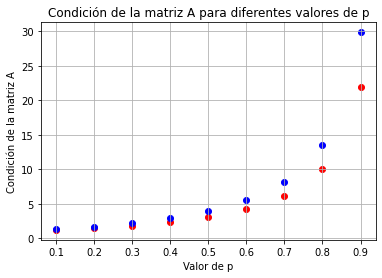

In [16]:
from funciones import *
import numpy as np
import matplotlib.pyplot as plt




archivo_test1 = './tests/test_dosestrellas.txt'
archivo_test11 = './tests/instagram_famosos_grafo.txt'
    
#CARGA DE ARCHIVO EN GRAFO
ejemplo1 = leer_archivo(archivo_test1)
ejemplo11 = leer_archivo(archivo_test11)

def cambiosCondicion(M):
    distintos_p = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    result = []
    for elem in distintos_p:
        p=elem
        npages = M.shape[0]
        I = np.eye(npages)
        D = I.copy()
        for j in range(npages):
            contador = 0
            for i in range(npages):
                contador += M[i][j]
            if contador != 0:
                D[j][j] = 1 / contador
            else:
                D[j][j] = 0  # Maneja el caso en que no hay enlaces salientes
        A = I - p*np.dot(M,D)
        result.append(np.linalg.cond(A))
    return result

print(cambiosCondicion(ejemplo1))    
print(cambiosCondicion(ejemplo11))        
# podemos ver en este ejemplo1, que los valores de la condicion cuando p se acerca a 1, empeoran. Es decir, que no son cercanos a 1.        
        
distintos_p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
result = cambiosCondicion(ejemplo1)
result1 = cambiosCondicion(ejemplo11)       
plt.scatter(distintos_p, result1, color='red')
# Generar el gráfico de dispersión
plt.scatter(distintos_p, result, color='blue')
plt.xlabel('Valor de p')
plt.ylabel('Condición de la matriz A')
plt.title('Condición de la matriz A para diferentes valores de p')
plt.grid(True)    
plt.show()    



## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [17]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


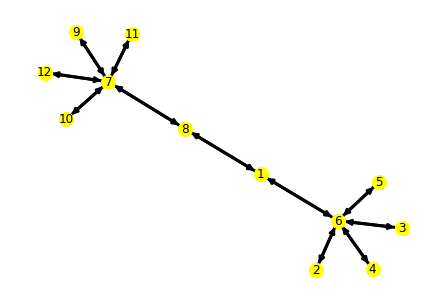

In [18]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.1811,atol=0.1))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

Creamos un caso de test más tal que la cantidad de páginas es igual que la cantidad de links. Cada página apunta a otra (no puede apuntar a dos) 
y además elige su destino de manera aleatoria. 

In [19]:
import random



def todos_con_todos(pags, links, nombre_archivo):
    with open(nombre_archivo, 'w') as archivo:
        # Escribir pags (cantidad total de páginas) en la primera línea
        archivo.write(str(pags) + '\n')
        
        # Escribir links (cantidad total de enlaces) en la segunda línea
        archivo.write(str(links) + '\n')
        
        # Generar los enlaces para cada página
        for pagina in range(1, pags + 1):
            for enlace in range(1, pags + 1):
                if enlace != pagina:
                    archivo.write(f"{pagina} {enlace}\n")

# Ejemplo de uso:
pags = 10  # Cantidad total de páginas
links = pags * (pags - 1)  # Cantidad total de enlaces
todos_con_todos(pags, links, "todoooos.txt")



def nadie_con_nadie(pags, links, nombre_archivo):
    with open(nombre_archivo, 'w') as archivo:
        # Escribir pags (cantidad total de páginas) en la primera línea
        archivo.write(str(pags) + '\n')
        
        # Escribir links (cantidad total de enlaces) en la segunda línea
        archivo.write(str(links) + '\n')
        
        
# Ejemplo de uso:
pagss = 30 # Cantidad total de páginas
linkss = 0  # Cantidad total de enlaces
nadie_con_nadie(pagss, linkss, "nadie.txt")    



def test_aleatorio(pags, links, nombre_archivo): 
    with open(nombre_archivo, 'w') as archivo:
        # Escribir pags (cantidad total de páginas) en la primera línea
        archivo.write(str(pags) + '\n')
        
        # Escribir links (cantidad total de enlaces) en la segunda línea
        archivo.write(str(links) + '\n')
        
        # Escribir el contenido de cada página y enlace
        for pagina in range(1, pags + 1):
            while True:
                enlace = random.randint(1, pags)  # Genera un enlace aleatorio entre 1 y 'pags'
                if enlace != pagina:
                    break
            archivo.write(f"{pagina} {enlace}\n")
        
    
    
    
pagsss = 15 # Cantidad total de páginas
linksss = pagsss  # Cantidad total de enlaces
test_aleatorio(pagsss, linksss, "aleat.txt")   

def todos_a_dos(pags, links, nombre_archivo): 
    with open(nombre_archivo, 'w') as archivo:
        # Escribir pags (cantidad total de páginas) en la primera línea
        archivo.write(str(pags) + '\n')
        
        # Escribir links (cantidad total de enlaces) en la segunda línea
        archivo.write(str(links) + '\n')
        
        # Escribir el contenido de cada página y enlace
        for pagina in range(1, pags + 1):
                enlace = 2  # Genera un enlace entre 2 y 'pags'
                if enlace != pagina:
        
                    archivo.write(f"{pagina} {enlace}\n")

pagssss = 6 # Cantidad total de páginas
linkssss = pagssss - 1 # Cantidad total de enlaces

todos_a_dos(pagssss,linkssss,"prueba_a_dos.txt")            

(array([2, 1, 8, 6, 5, 4, 3, 0, 9, 7]), array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))


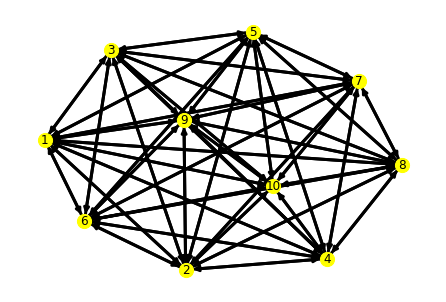

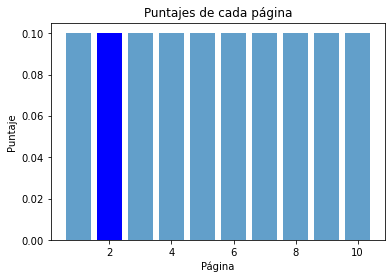

In [20]:
import matplotlib.pyplot as plt

# Supongamos que leer_archivo, dibujarGrafo y calcularRanking están definidos
archivo_test = './tests/todoooos.txt'

# CARGA DE ARCHIVO EN GRAFO
T = leer_archivo(archivo_test)

# Dibujar el grafo en una figura separada
plt.figure()
dibujarGrafo(T, print_ejes=False)

print(calcularRanking(T,0.5))
# Crear el gráfico de barras en una figura separada
def plot_distintos_rankings1():
    paginas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    ranking, puntaje = calcularRanking(T, 0.5)
    
    plt.figure()  # Crear una nueva figura
    plt.bar(paginas, puntaje, align='center', alpha=0.7)
    
    # Resaltar la barra del ganador en verde
    ganador_index = ranking[0]  # Ajustar el índice a la posición correcta en la lista
    plt.bar(ganador_index, puntaje[ganador_index], color='blue')
    
    # Etiquetas de los ejes y título
    plt.xlabel('Página')
    plt.ylabel('Puntaje')
    plt.title('Puntajes de cada página')
    
    # Mostrar el gráfico
    plt.show()

# Llamar a la función para dibujar los gráficos
plot_distintos_rankings1()



Este gráfico muestra lo que esperabamos, porque básicamente si todos se apuntan con todos, no va a haber diferencias en el ranking. Los puntajes, podemos ver que son 0.1 para todas las páginas. 

(array([29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]), array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]))


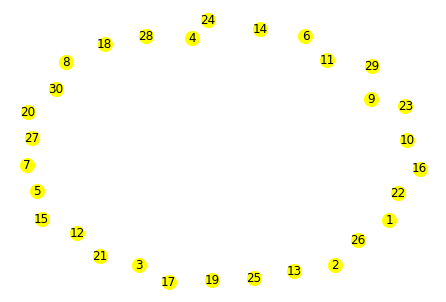

In [21]:
import matplotlib.pyplot as plt

# Supongamos que leer_archivo y calcularRanking están definidos
archivo_test2 = './tests/nadie.txt'

# CARGA DE ARCHIVO EN GRAFO
F = leer_archivo(archivo_test2)

# Dibujar el grafo (asumiendo que dibujarGrafo está definido)
dibujarGrafo(F, print_ejes=False)

# Lista de 1 a 30
lista = list(range(1, 31)) 

print(calcularRanking(F,0.5))
# Calcular el ranking y puntaje (asumiendo que calcularRanking está definido)


Este caso es análogo al caso anterior donde todos se apuntan con todos. El ranking de cada página va a ser igual ya que cada página está en igualdad de condiciones. Cualquier nodo tiene cero links salientes y cero links entrantes. Eso hace que el puntaje para cualquier nodo sea igual, y que nadie se apunte con nadie.

(array([ 4,  0,  1,  7, 14,  9, 13, 11, 10, 12,  8,  6,  5,  3,  2]),
 array([0.12986111, 0.09166667, 0.03333333, 0.03333333, 0.19305556,
        0.03333333, 0.03333333, 0.08333333, 0.03333333, 0.07291667,
        0.05      , 0.05      , 0.03333333, 0.05      , 0.07916667]))

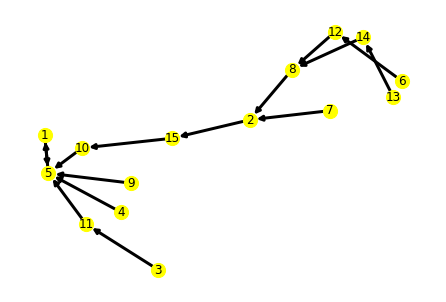

In [22]:
archivo_test3 = './tests/aleat.txt'
    
#CARGA DE ARCHIVO EN GRAFO
A = leer_archivo(archivo_test3)

dibujarGrafo(A, print_ejes=False)


calcularRanking(A,0.5)

Al ser un test aleatorio, el ganador también va a ser aleatorio. Ya que no hay una página que será más importante que otra. 
Cada página apunta a una cualquiera, y esa es la única regla. En alguna prueba, quizas a la pagina x le apuntan más pagina que a otra página y, pero nunca va a ver una tendencia ni explicación para eso. 

(array([1, 5, 4, 3, 2, 0]), array([0.11764706, 0.41176471, 0.11764706, 0.11764706, 0.11764706,
       0.11764706]))


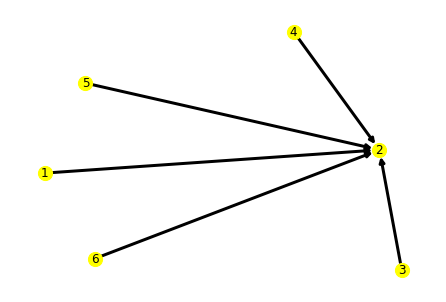

In [23]:
import matplotlib.pyplot as plt

# Supongamos que leer_archivo y calcularRanking están definidos
archivo_test4 = './tests/prueba_a_dos.txt'

# CARGA DE ARCHIVO EN GRAFO
F = leer_archivo(archivo_test4)

# Dibujar el grafo (asumiendo que dibujarGrafo está definido)
dibujarGrafo(F, print_ejes=False)

print(calcularRanking(F,0.5))
# Calcular el ranking y puntaje (asumiendo que calcularRanking está definido)

Nuestra hipótesis antes de correr calcularRanking es que la página ganadora iba a ser la página dos. Esto ocurre porque todas apuntan hacia ella, aumentando la importancia de la página.
Podemos ver en este grafico, que se cumple nuestra hipótesis. 

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


Para el análisis cuantitativo hicimos gráficos lineales. El primero, es para gráficos densos, donde todas las posiciones de la matriz de conectividad son 1 (excepto en la diagonal donde son 0). Acá vemos claramente una derivada positiva. En este primer gráfico, fuimos aumentando la dimensión de la matriz, es decir, la cantidad de páginas. 
Vemos que tiene sentido que crezca el tiempo de ejecución de calcularRanking ya que es más costoso computacionalmente operar con matrices más grandes. 
Luego, vemos en el otro gráfico, que no se ven una pendiente positiva, si no algo más aplanado. En este caso, fuimos aumentando la cantidad de links, yendo de un grafo no denso, a uno denso. Lo que se traduce en estar haciendo cuentas con unos, en vez de con ceros. Creeemos que eso no aumenta la complejidad computacional y que los gráficos reconfirman esa conjetura.


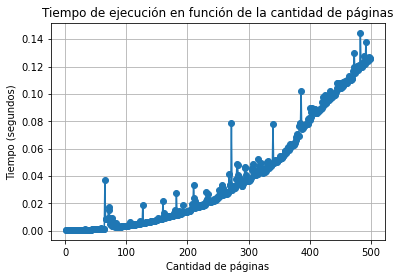

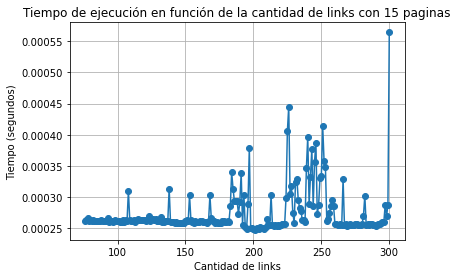

In [24]:
import time
import matplotlib.pyplot as plt


def crear_matrices(dimension):
    matriz = np.zeros((dimension, dimension))
    for i in range(dimension): 
        matriz[i] = np.ones(dimension)
    np.fill_diagonal(matriz, 0)  # Modificar la matriz directamente, no hace falta asignar
    return matriz
 
def crear_data(cantidad): 
    tiempos = []
    for i in range(1,cantidad): 
        matriz_actual = crear_matrices(i)
        inicio = time.time()
        xd = calcularRanking(matriz_actual,0.5)
        fin = time.time()
        tiempo_transcurrido = fin - inicio
        tripla=(i,i*i,tiempo_transcurrido) 
        tiempos.append(tripla)

    return tiempos    

data = crear_data(500)

cantidad_paginas = [item[0] for item in data]
tiempo = [item[2] for item in data]

# Crear el gráfico
plt.plot(cantidad_paginas, tiempo, marker='o', linestyle='-')
plt.title('Tiempo de ejecución en función de la cantidad de páginas')
plt.xlabel('Cantidad de páginas')
plt.ylabel('Tiempo (segundos)')
plt.grid(True)
plt.show()



def graf_links(): 
    mi_matriz = crear_matrices(15)
    fila = mi_matriz.shape[0]
    tiempo_link = []
    cants_actuales = []
    cantidad_links = 300
    for i in range(fila): 
        for j in range(fila):
            inicio = time.time()
            calcularRanking(mi_matriz,0.5)
            fin = time.time()
            tiempo_transcurrido = fin - inicio
            tiempo_link.append(tiempo_transcurrido)
            cants_actuales.append(cantidad_links)
            mi_matriz[i][j] = 0
            cantidad_links -= 1
            
    return cants_actuales, tiempo_link       
            
            

cant, temp = graf_links()

plt.plot(cant, temp, marker='o', linestyle='-')
plt.title('Tiempo de ejecución en función de la cantidad de links con 15 paginas')
plt.xlabel('Cantidad de links')
plt.ylabel('Tiempo (segundos)')
plt.grid(True)
plt.show()




 

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


Para el análisis cualitativo hicimos gráficos de barras, para cada probabilidad descripta en la variable "distintos_rankings". Los mismos, muestran el "ganador"(el que tiene mejor ranking) en color verde a medida que cambiamos la probabilidad. 
Luego vemos que, si bien en algún que otro caso varía el ganador, la misma no es abismal. 
El ganador varia solo entre dos páginas, las cuales en todas las iteraciones tienen puntajes con muy poca diferencia.


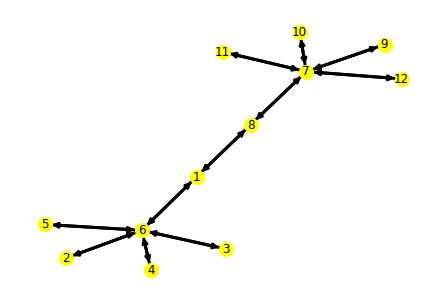

In [62]:
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

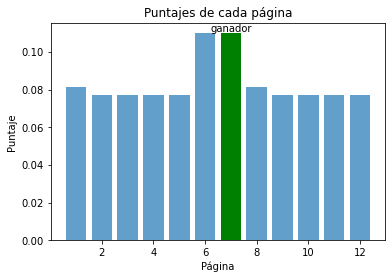

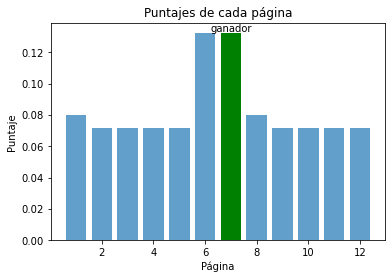

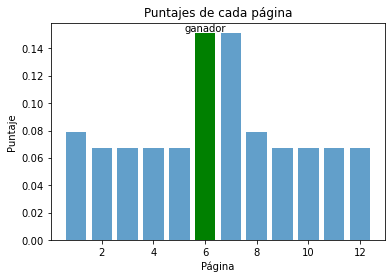

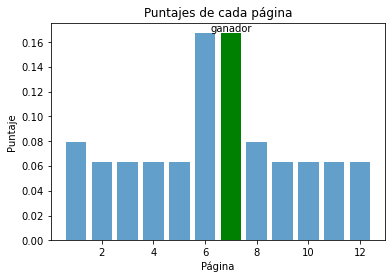

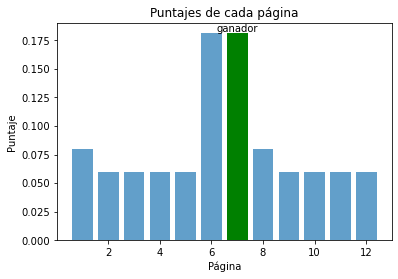

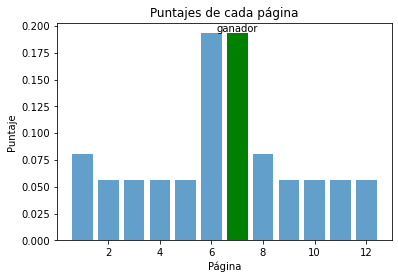

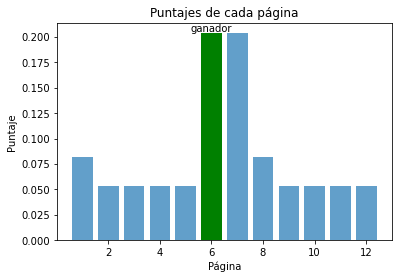

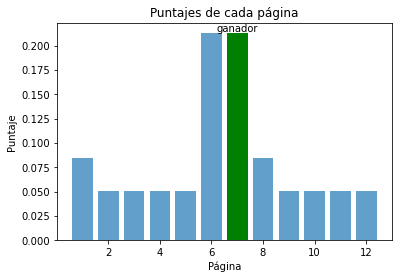

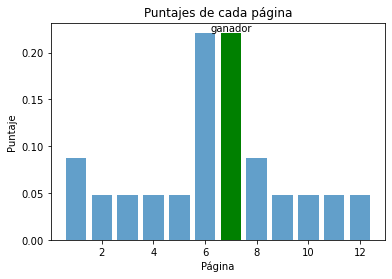

In [63]:
import matplotlib.pyplot as plt

distintos_rankings = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
paginas = [1,2,3,4,5,6,7,8,9,10,11,12]

archivo_test = './tests/test_dosestrellas.txt'



def plot_distintos_rankings():
    distintos_rankings = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    paginas = [1,2,3,4,5,6,7,8,9,10,11,12]

    for elem in distintos_rankings:
        ranking, puntaje = calcularRanking(W, elem)

        # Crear el gráfico de barras
        plt.bar(paginas, puntaje, align='center', alpha=0.7)

        # Resaltar la barra del ganador en verde
        plt.bar(ranking[0]+1, puntaje[ranking[0]], color='green',label='Ganador')
        plt.text(ranking[0]+1, puntaje[ranking[0]], 'ganador', ha='center', va='bottom')

        # Etiquetas de los ejes y título
        plt.xlabel('Página')
        plt.ylabel('Puntaje')
        plt.title('Puntajes de cada página')

        # Mostrar el gráfico
        plt.show()

plot_distintos_rankings()


Notamos que el ganador es 6 o 7 sin importar la probabilidad. Comprobamos con el grafo dos estrellas (que es simétrico), donde las páginas más importantes son la 6 y la 7 porque todas apuntan hacia ellas. Por otro lado, vemos en el gráfico, que las páginas 1 y 8 son apuntadas por 6 y 7 respectivamente, por lo tanto tienen mayor importancia que el resto. 
También vemos que a medida que crece la probabilidad, la diferencia de importancia de cada página (su score) en relación a las demás, se acentúa.

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



Creemos que la cantidad mínima de links a agregar es 5.  
Vimos que el gráfico era simétrico. Es decir, que 2,3,4,5 y 9,10,11,12 tienen el mismo score. Luego, hicimos que a 1, la apunten 5 de esas páginas. Como solo 4 de ellas están apuntando a 6 y a 7, la página 1 tiene más score.

También evaluamos, además de que paginas importantes apunten a 1, hacer que paginas importantes, apunten a otras páginas importantes, y que esas a su vez apunten a uno. 

De todas maneras, sabemos que esta es una respuesta tentativa y que puede ser falsa, ya que no evaluamos todas las combinaciones posibles y construimos la respuesta apuntando páginas a uno de "buena calidad". Si hicieramos un algoritmo que explore todo el espacio de soluciones podriamos decir con certeza cuál es la menor cantidad de links.

In [88]:
archivo_test = './tests/test_dosestrellas.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

W_copia = W.copy()
W_en4 = W.copy()
W_ejemplo = W.copy()

W_en4[0][10] = 1
W_en4[0][9] = 1
W_en4[0][1] = 1
W_en4[0][2] = 1
W_en4[0][3] = 1

W_copia[0][6] = 1
W_copia[0][5] = 1
W_copia[6][5] = 1
W_copia[5][6] = 1

W_ejemplo[0][9] = 1
W_ejemplo[0][10] = 1
W_ejemplo[0][2] = 1
W_ejemplo[0][5] = 1
W_ejemplo[0][6] = 1

print(calcularRanking(W_en4,0.5))
print(calcularRanking(W_copia,0.5))
print(calcularRanking(W_ejemplo,0.5))



(array([ 0,  6,  5,  7, 11,  9,  8,  4,  3,  2,  1, 10]), array([0.15120275, 0.05670103, 0.05670103, 0.05670103, 0.05670103,
       0.15034364, 0.15034364, 0.09450172, 0.05670103, 0.05670103,
       0.05670103, 0.05670103]))
(array([ 5,  6,  0,  7,  4,  3,  2,  1, 11,  8, 10,  9]), array([0.09056679, 0.05776853, 0.05776853, 0.05776853, 0.05776853,
       0.19322235, 0.18727705, 0.0776853 , 0.0550436 , 0.0550436 ,
       0.0550436 , 0.0550436 ]))
(array([ 5,  6,  0,  7,  4,  3,  2,  1, 11,  9, 10,  8]), array([0.13528026, 0.05965496, 0.05965496, 0.05965496, 0.05965496,
       0.17988291, 0.1440449 , 0.08749047, 0.05367041, 0.05367041,
       0.05367041, 0.05367041]))
